In [ ]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt


In [49]:
data = pd.read_csv("data/data_project_metset.csv", sep=";")
codebook = pd.read_json("data/codebook.json")

In [50]:
data.info()
codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 283 entries, lfdn to rts7288990
dtypes: int64(267), object(16)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   group_id       21 non-null     object
 1   main_question  21 non-null     object
 2   items          21 non-null     object
 3   options        18 non-null     object
dtypes: object(4)
memory usage: 804.0+ bytes


In [70]:
questions = []
for item_dict in codebook['items']:
    for k, v in item_dict.items():
        if 'label' in v:
            questions.append(k)

In [71]:
questions

['v_1752',
 'v_1753',
 'v_1749',
 'v_1747',
 'v_71',
 'v_1762',
 'v_2937',
 'v_1751',
 'dupl1_v_69',
 'v_2920',
 'v_1750',
 'v_1748',
 'v_2938',
 'v_2851',
 'v_2852',
 'v_2853',
 'v_2854',
 'v_2855',
 'v_2856',
 'v_1709',
 'v_1710',
 'v_1711',
 'v_1712',
 'v_1713',
 'v_1714',
 'v_1715',
 'v_1717',
 'v_1718',
 'v_1720',
 'v_1722',
 'v_1724',
 'v_1726',
 'v_1728',
 'v_1730',
 'v_1732',
 'v_1734',
 'v_1707',
 'v_1719',
 'v_2894',
 'v_2895',
 'v_2896',
 'v_2897',
 'v_2898',
 'v_2899',
 'v_2900',
 'v_2901',
 'v_2902',
 'v_2903',
 'v_2904',
 'v_2905',
 'v_2906',
 'v_2907',
 'v_2908',
 'v_2909',
 'v_2910',
 'v_2911',
 'v_2918',
 'v_2702',
 'v_2703',
 'v_2704',
 'v_2705',
 'v_2706',
 'v_2707',
 'v_2708',
 'v_2709',
 'v_2710',
 'v_2711',
 'v_2712',
 'v_2713',
 'v_2714',
 'v_2715',
 'v_2716',
 'v_2717',
 'v_2718',
 'v_2719',
 'v_2756',
 'v_2757',
 'v_2758',
 'v_2759',
 'v_2760',
 'v_2761',
 'v_2762',
 'v_2763',
 'v_2764',
 'v_2765',
 'v_2766',
 'v_2767',
 'v_2768',
 'v_2769',
 'v_2770',
 'v_2771

In [17]:
data.dtypes

lfdn             int64
external_lfdn    int64
tester           int64
dispcode         int64
lastpage         int64
                 ...  
rts7288986       int64
rts7288987       int64
rts7288988       int64
rts7288989       int64
rts7288990       int64
Length: 283, dtype: object

In [20]:
data.columns

Index(['lfdn', 'external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
       'duration', 'p_0001', 'browser', 'referer',
       ...
       'rts7288979', 'rts7288980', 'rts7288981', 'rts7288982', 'rts7288983',
       'rts7288986', 'rts7288987', 'rts7288988', 'rts7288989', 'rts7288990'],
      dtype='object', length=283)

In [35]:
df = data.copy()
df.columns

Index(['lfdn', 'external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
       'duration', 'p_0001', 'browser', 'referer',
       ...
       'rts7288979', 'rts7288980', 'rts7288981', 'rts7288982', 'rts7288983',
       'rts7288986', 'rts7288987', 'rts7288988', 'rts7288989', 'rts7288990'],
      dtype='object', length=283)

In [37]:
columns_to_drop = df.filter(regex=r'^rts\d+').columns

df = df.drop(columns=columns_to_drop)

In [38]:
df.columns

Index(['lfdn', 'external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
       'duration', 'p_0001', 'browser', 'referer',
       ...
       'v_2933', 'v_1658', 'v_1659', 'v_1660', 'v_1661', 'v_1662', 'v_1663',
       'v_1664', 'v_1665', 'v_2920'],
      dtype='object', length=260)

In [40]:
df.drop(columns=['external_lfdn', 'tester'])

,lfdn,dispcode,lastpage,quality,duration,p_0001,browser,referer,device_type,quota,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,31,7288991,-77,456,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,0,1,...,5,2,4,4,1,5,3,5,3,test
1,7,31,7288991,-77,1717,1199209,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,https://norstatsurveys.com/,0,2,...,3,2,2,5,2,1,3,3,2,-99
2,8,31,7288991,-77,598,101222,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,-99,0,2,...,5,3,1,4,3,2,1,3,3,-99
3,9,32,7288991,-77,-1,100212,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,https://norstatsurveys.com/,0,7,...,3,1,1,5,4,1,1,4,2,-99
4,11,31,7288991,-77,1127,1184194,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,https://norstatsurveys.com/,0,3,...,5,2,2,5,4,2,1,4,1,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1897,31,7288991,-77,1453,258847127,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A52...,https://spectrumsurveys.com/,0,6,...,4,1,1,1,3,2,1,5,1,-99
956,1916,31,7288991,-77,991,258067049,Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like...,https://spectrumsurveys.com/,0,6,...,3,3,3,2,3,3,3,2,3,-99
957,1968,31,7288991,-77,694,256316874,Mozilla/5.0 (Linux; Android 10; LM-G710) Apple...,https://spectrumsurveys.com/,0,6,...,4,2,1,5,4,2,4,5,1,-99
958,2034,31,7288991,-77,2787,256406883,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,https://spectrumsurveys.com/,0,6,...,5,1,1,5,4,3,4,3,2,"Danke für diese Umfrage, war sehr toll und int..."


In [43]:
single_value_cols = df.columns[df.nunique() == 1]
single_value_cols

Index(['external_lfdn', 'tester', 'lastpage', 'quality', 'device_type',
       'quota_rejected_id', 'output_mode', 'javascript', 'flash', 'language',
       'cleaned', 'date_of_first_mail', 'v_2889', 'v_2890', 'v_2891', 'v_2892',
       'v_1754'],
      dtype='object')

In [ ]:
single_value_cols_to_drop = single_value_cols[:11]

In [46]:
df = df.drop(columns=single_value_cols_to_drop)

In [48]:
df.dtypes

lfdn         int64
dispcode     int64
duration     int64
p_0001      object
browser     object
             ...  
v_1662       int64
v_1663       int64
v_1664       int64
v_1665       int64
v_2920      object
Length: 249, dtype: object

In [72]:
df = df[df.columns.intersection(questions)]

In [73]:
df

,v_1752,v_1751,v_1749,v_1750,v_1747,v_1748,v_1753,v_1762,v_2937,v_2938,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,2,27,4,-99,1,-99,1,1,1,-99,...,5,2,4,4,1,5,3,5,3,test
1,2,30,2,-99,2,-99,7,1,6,Eigenheim,...,3,2,2,5,2,1,3,3,2,-99
2,2,48,3,-99,1,-99,8,2,3,-99,...,5,3,1,4,3,2,1,3,3,-99
3,2,44,4,-99,1,-99,1,2,3,-99,...,3,1,1,5,4,1,1,4,2,-99
4,1,34,3,-99,1,-99,3,2,2,-99,...,5,2,2,5,4,2,1,4,1,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,39,3,-99,1,-99,9,1,2,-99,...,4,1,1,1,3,2,1,5,1,-99
956,2,39,2,-99,1,-99,7,3,1,-99,...,3,3,3,2,3,3,3,2,3,-99
957,2,37,3,-99,2,-99,5,3,3,-99,...,4,2,1,5,4,2,4,5,1,-99
958,2,37,1,-99,2,-99,1,3,3,-99,...,5,1,1,5,4,3,4,3,2,"Danke für diese Umfrage, war sehr toll und int..."


In [86]:
na = ["0", "-66", "-77", "-99"]

In [87]:
df = df.replace(na, np.nan)

In [88]:
df.isna().sum()

v_1752      0
v_1751      0
v_1749      0
v_1750    956
v_1747      0
         ... 
v_1662      0
v_1663      0
v_1664      0
v_1665      0
v_2920    810
Length: 229, dtype: int64

In [89]:
df

,v_1752,v_1751,v_1749,v_1750,v_1747,v_1748,v_1753,v_1762,v_2937,v_2938,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,2,27,4,NaN,1,NaN,1,1,1.0,NaN,...,5,2,4,4,1,5,3,5,3,test
1,2,30,2,NaN,2,NaN,7,1,6.0,Eigenheim,...,3,2,2,5,2,1,3,3,2,NaN
2,2,48,3,NaN,1,NaN,8,2,3.0,NaN,...,5,3,1,4,3,2,1,3,3,NaN
3,2,44,4,NaN,1,NaN,1,2,3.0,NaN,...,3,1,1,5,4,1,1,4,2,NaN
4,1,34,3,NaN,1,NaN,3,2,2.0,NaN,...,5,2,2,5,4,2,1,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,39,3,NaN,1,NaN,9,1,2.0,NaN,...,4,1,1,1,3,2,1,5,1,NaN
956,2,39,2,NaN,1,NaN,7,3,1.0,NaN,...,3,3,3,2,3,3,3,2,3,NaN
957,2,37,3,NaN,2,NaN,5,3,3.0,NaN,...,4,2,1,5,4,2,4,5,1,NaN
958,2,37,1,NaN,2,NaN,1,3,3.0,NaN,...,5,1,1,5,4,3,4,3,2,"Danke für diese Umfrage, war sehr toll und int..."


In [100]:
df = df.dropna(axis=1)

In [101]:
df

,v_1752,v_1751,v_1749,v_1747,v_1753,v_1762,dupl1_v_69,v_71,v_2851,v_2852,...,v_2932,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665
0,2,27,4,1,1,1,1,4,1,2,...,2,5,2,4,4,1,5,3,5,3
1,2,30,2,2,7,1,3,4,2,2,...,3,3,2,2,5,2,1,3,3,2
2,2,48,3,1,8,2,2,5,4,4,...,5,5,3,1,4,3,2,1,3,3
3,2,44,4,1,1,2,3,11,1,1,...,3,3,1,1,5,4,1,1,4,2
4,1,34,3,1,3,2,2,5,4,3,...,5,5,2,2,5,4,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,39,3,1,9,1,5,3,1,1,...,4,4,1,1,1,3,2,1,5,1
956,2,39,2,1,7,3,1,11,1,2,...,3,3,3,3,2,3,3,3,2,3
957,2,37,3,2,5,3,2,9,1,5,...,4,4,2,1,5,4,2,4,5,1
958,2,37,1,2,1,3,1,1,1,2,...,5,5,1,1,5,4,3,4,3,2


In [103]:
df.dtypes

v_1752    int64
v_1751    int64
v_1749    int64
v_1747    int64
v_1753    int64
          ...  
v_1661    int64
v_1662    int64
v_1663    int64
v_1664    int64
v_1665    int64
Length: 82, dtype: object

In [104]:
codebook.get('types')

In [111]:
dtype_mapping = {}

for item_dict in codebook['items']:
    if not isinstance(item_dict, dict):
        continue

    for col_name, col_info in item_dict.items():
        if col_name in df.columns:
            t = col_info.get('type')
            
            if t in ['nominal', 'ordinal', 'grouped_metric']:
                dtype_mapping[col_name] = 'category'
            elif t in ['metric']:
                dtype_mapping[col_name] = 'float64'
            elif t in 'free_text':
                dtype_mapping[col_name] = 'string'

dtype_mapping
            
            

{'v_1752': 'category',
 'v_1753': 'category',
 'v_1749': 'category',
 'v_1747': 'category',
 'v_71': 'category',
 'v_1762': 'category',
 'v_1751': 'float64',
 'dupl1_v_69': 'float64',
 'v_2851': 'category',
 'v_2852': 'category',
 'v_2853': 'category',
 'v_2854': 'category',
 'v_2855': 'category',
 'v_2856': 'category',
 'v_1709': 'category',
 'v_1710': 'category',
 'v_1711': 'category',
 'v_1712': 'category',
 'v_1713': 'category',
 'v_1714': 'category',
 'v_1715': 'category',
 'v_1717': 'category',
 'v_1718': 'category',
 'v_1720': 'category',
 'v_1722': 'category',
 'v_1724': 'category',
 'v_1726': 'category',
 'v_1728': 'category',
 'v_1730': 'category',
 'v_1732': 'category',
 'v_1734': 'category',
 'v_1573': 'category',
 'v_1574': 'category',
 'v_1575': 'category',
 'v_2936': 'category',
 'v_1625': 'category',
 'v_1626': 'category',
 'v_1627': 'category',
 'v_1628': 'category',
 'v_1629': 'category',
 'v_1630': 'category',
 'v_1631': 'category',
 'v_1632': 'category',
 'v_1633': 

In [112]:
df = df.astype(dtype_mapping)

In [113]:
df.dtypes

v_1752    category
v_1751     float64
v_1749    category
v_1747    category
v_1753    category
            ...   
v_1661    category
v_1662    category
v_1663    category
v_1664    category
v_1665    category
Length: 82, dtype: object

In [114]:
df.corr()

,v_1752,v_1751,v_1749,v_1747,v_1753,v_1762,dupl1_v_69,v_71,v_2851,v_2852,...,v_2932,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665
v_1752,1.000000,0.112014,-0.043855,-0.164186,-0.056655,-0.077589,0.003048,0.027235,0.078985,0.189954,...,-0.006071,-0.016725,0.092614,-0.007561,0.024242,-0.051936,0.074093,0.078833,-0.113918,0.117674
v_1751,0.112014,1.000000,-0.167444,-0.201239,-0.032454,-0.013178,-0.180213,0.006050,0.078807,-0.015269,...,0.028402,0.049230,-0.110722,-0.165215,0.135475,0.023173,-0.242388,-0.192063,0.115579,-0.055624
v_1749,-0.043855,-0.167444,1.000000,0.042253,-0.034836,-0.048410,-0.033687,0.173364,-0.069577,0.050261,...,-0.035969,-0.074434,-0.092511,-0.053271,0.123157,0.137246,-0.011741,-0.056538,0.054899,-0.014963
v_1747,-0.164186,-0.201239,0.042253,1.000000,-0.019234,0.063655,0.045208,-0.094767,-0.043535,-0.025217,...,0.010939,0.010959,-0.003197,0.039365,-0.094159,-0.013612,0.038475,0.022109,-0.010820,0.006963
v_1753,-0.056655,-0.032454,-0.034836,-0.019234,1.000000,-0.133740,0.076118,-0.030771,0.079536,-0.009244,...,-0.005220,0.008674,0.050622,0.022495,-0.071094,-0.038436,-0.037274,-0.017650,-0.075857,-0.029911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v_1661,-0.051936,0.023173,0.137246,-0.013612,-0.038436,-0.040529,-0.070260,0.119218,-0.050853,0.008352,...,0.073233,0.071332,-0.241629,-0.121765,0.270220,1.000000,-0.117600,-0.154099,0.281822,-0.120927
v_1662,0.074093,-0.242388,-0.011741,0.038475,-0.037274,0.068008,-0.020233,0.008171,0.084526,0.128845,...,0.146193,0.141786,0.379542,0.425701,-0.058166,-0.117600,1.000000,0.428357,-0.158151,0.208832
v_1663,0.078833,-0.192063,-0.056538,0.022109,-0.017650,0.054774,-0.005466,-0.023600,0.022033,0.083939,...,0.090664,0.085027,0.336745,0.331809,-0.057507,-0.154099,0.428357,1.000000,-0.232770,0.241686
v_1664,-0.113918,0.115579,0.054899,-0.010820,-0.075857,0.029749,-0.092347,0.042112,0.046978,0.006886,...,0.098385,0.130536,-0.223545,-0.160053,0.243682,0.281822,-0.158151,-0.232770,1.000000,-0.227920


<Axes: >

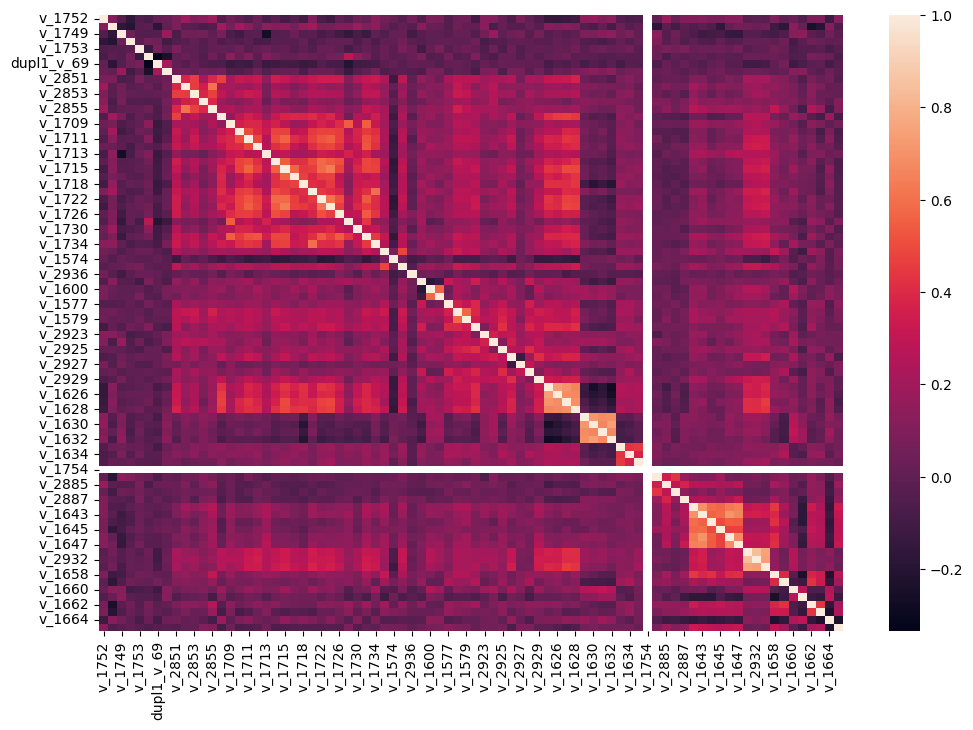

In [123]:
plt.figure(figsize=(12,8))
snb.heatmap(df.corr())

[] make functions

[] Filter codebook for ordinal & metric types

[] Check if in df. columns

[] drop columns where df.corr().abs() is <= 0.5

[] plot

[] append to list

[] check full questions

[] make hypothesis

[] ask prof

[] dive into single questions

[] make .rmd